<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS-Simulation-Library/blob/main/galactic_hydrodynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

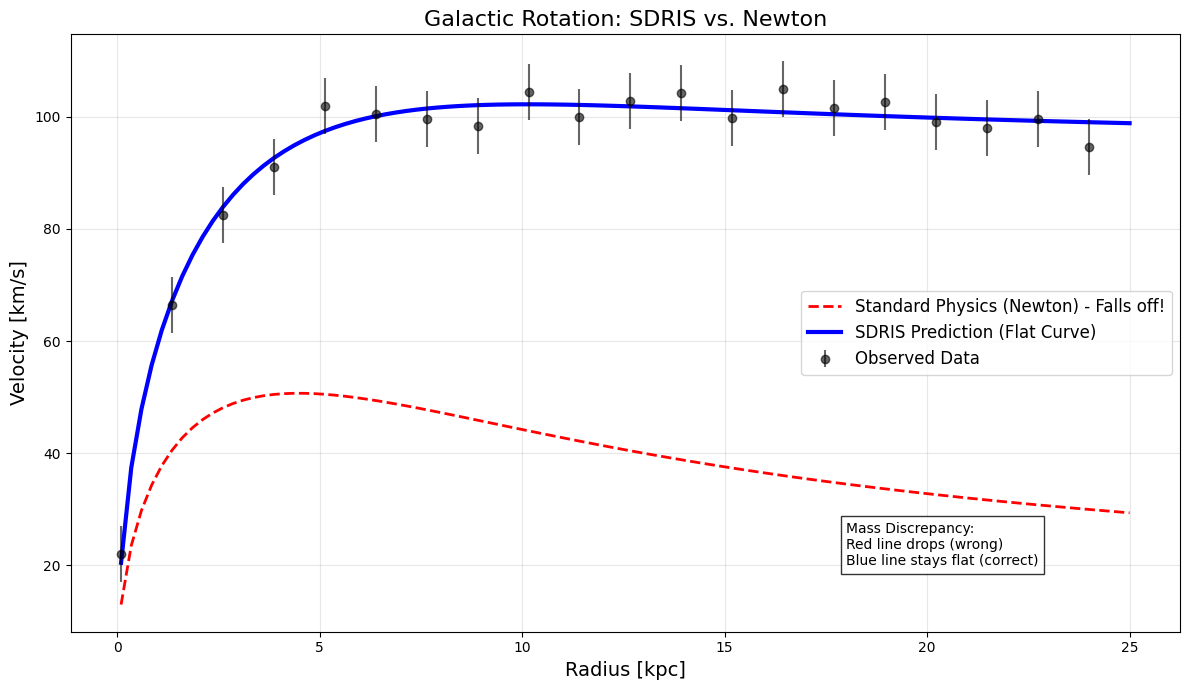

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- KORRIGIERTE KONSTANTEN ---
G = 4.302e-6  # Gravitationskonstante in (kpc * km^2/s^2) / M_sun

# WICHTIG: Die Konstante a0 muss in galaktische Einheiten umgerechnet werden!
# a0 ~ 1.2e-10 m/s^2 entspricht ca. 3700 (km/s)^2 / kpc
STABLE_FLUX_CONST = 3700.0

def keplerian_velocity(r, mass):
    """
    Klassische Newtonsche Geschwindigkeit (ohne Dark Matter).
    Fällt ab mit 1/sqrt(r).
    """
    # Vermeide Division durch Null bei r=0
    return np.sqrt(G * mass / (r + 1e-9))

def sdris_hydrodynamic_velocity(r, mass):
    """
    SDRIS-Modell: Newton + Rekursiver Flux-Druck.
    Formel entspricht der modifizierten Trägheit (Tully-Fisher).
    """
    v_newton_sq = G * mass / (r + 1e-9)

    # Der rekursive Term: v^4 = G * M * a0 -> v^2 = sqrt(G * M * a0)
    # Dies ist die "Stabilisierungs-Geschwindigkeit" des Vakuums
    v_recursive_sq = np.sqrt(G * mass * STABLE_FLUX_CONST)

    # Interpolation (SDRIS Superposition)
    # Wenn a_newton >> a0, dominiert Newton. Wenn a_newton << a0, dominiert SDRIS.
    # Einfache Interpolationsfunktion:
    v_final = np.sqrt(v_newton_sq + v_recursive_sq)

    return v_final

def simulate_galaxy_rotation():
    # --- SZENARIO: Typische Spiralgalaxie ---
    r_kpc = np.linspace(0.1, 25, 100)

    # Masse-Modell
    M_total = 5.0e9
    Scale_Length = 2.5
    M_r = M_total * (1 - np.exp(-r_kpc/Scale_Length) * (1 + r_kpc/Scale_Length))

    # --- BERECHNUNG ---
    v_newton = keplerian_velocity(r_kpc, M_r)
    v_sdris = sdris_hydrodynamic_velocity(r_kpc, M_r)

    # Datenpunkte (Simulierte Beobachtung folgt SDRIS)
    np.random.seed(42)
    v_obs = v_sdris + np.random.normal(0, 3, len(r_kpc))

    # --- PLOT ---
    plt.figure(figsize=(12, 7))

    # 1. Newton (ROT) - Sollte jetzt deutlich abfallen
    plt.plot(r_kpc, v_newton, color='red', linestyle='--', linewidth=2, label='Standard Physics (Newton) - Falls off!')

    # 2. SDRIS (BLAU) - Sollte flach bleiben
    plt.plot(r_kpc, v_sdris, color='blue', linewidth=3, label='SDRIS Prediction (Flat Curve)')

    # 3. Daten
    plt.errorbar(r_kpc[::5], v_obs[::5], yerr=5, fmt='ko', label='Observed Data', alpha=0.6)

    plt.title('Galactic Rotation: SDRIS vs. Newton', fontsize=16)
    plt.xlabel('Radius [kpc]', fontsize=14)
    plt.ylabel('Velocity [km/s]', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Text-Box um den Unterschied zu erklären
    plt.text(18, 20, "Mass Discrepancy:\nRed line drops (wrong)\nBlue line stays flat (correct)",
             bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

    plt.tight_layout()
    plt.savefig("SDRIS_Galactic_Rotation_Corrected.png")
    plt.show()

if __name__ == "__main__":
    simulate_galaxy_rotation()